# **TRABALHANDO COM EASYOCR**

### Arquitetura EasyOCR, baseado em Deep Learning

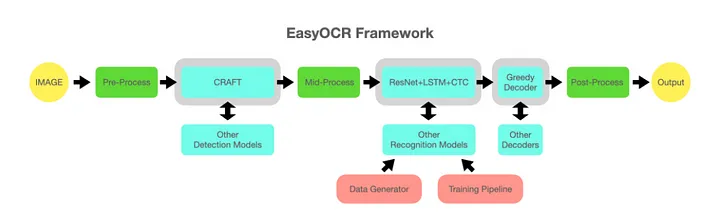

1. Realiza a localização do ROI com o modelo baseado em CRAFT (Character Region Awareness for Text Detection)
    - O CRAFT detecta cada caractere separadamente e depois agrupa com base na distância para formar palavras. 
    - Cria um mapa de afinidade que identifica como os caracteres estão conectados uns aos outros, para distinguir palavras. 
    - Cria os Bounding Boxes. 

2. Próximo passo, realiza o reconhecimento com CRNN (Convolutional Recurrent Neural Network)
    - Uso de CNN, para features visuais
    - Uso de LSTM ou GRU, para modelar a sequência de caracteres. 
    - Uso de CTC (Connectionist Temporal Classification), para alinhar os letras extraidas do CNN. 

3. Pós-processamento, com correção ortográfica com base em dicionários, quebras de linha e se quiser, filtro de letras que não são do dicionário.


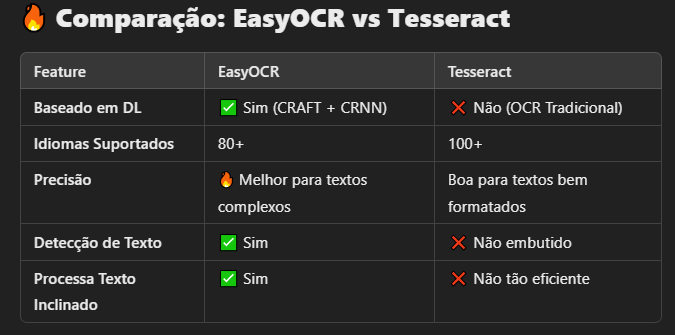


Quando usar EasyOCR?

✔️ Para textos manuscritos, estilizados ou complexos.

✔️ Para imagens com texto inclinado ou distorcido.

Quando usar Tesseract?

✔️ Para documentos bem formatados e digitalizados.

✔️ Quando o desempenho é mais importante que a precisão.

In [1]:
#Instale com o pip install easyocr

In [2]:
#Importações

from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

In [3]:
#Fazendo nossa função de leitura de imagem

def imshow(titulo = 'Imagem', imagem = None, size=10):
    w, h = imagem.shape[0], imagem.shape[1]
    aspectRatio = w/h
    plt.figure(figsize=(size * aspectRatio, size))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.show()


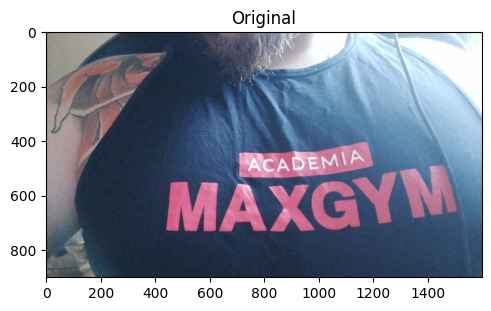

In [4]:
imagem = cv2.imread('imagens/Camiseta.jpg')
imagem = cv2.flip(imagem, 1)
imshow('Original', imagem)



In [5]:
print('Detectando o texto da imagem com CPU...')
leitorCPU = Reader(['pt'], gpu=False)
#VENDO O TEMPO DE PROCESSAMENTO EM CPU
tempoInicio = time.time()
resultadoCPU = leitorCPU.readtext(imagem)
tempoFinal = time.time()
tempo = tempoFinal - tempoInicio
print(f'\nA detecção foi em {tempo} segundos')

Using CPU. Note: This module is much faster with a GPU.


Detectando o texto da imagem com CPU...

A detecção foi em 3.581756591796875 segundos


In [6]:
print('Detectando o texto da imagem com GPU...')
#Instalar o Pytorch com CUDA - https://pytorch.org/get-started/locally/
leitorGPU = Reader(['pt'], gpu=True)
#VENDO O TEMPO DE PROCESSAMENTO EM GPU
tempoInicio = time.time()
resultado = leitorGPU.readtext(imagem)
tempoFinal = time.time()
tempo = tempoFinal - tempoInicio
print(f'\nA detecção foi em {tempo} segundos')

Detectando o texto da imagem com GPU...

A detecção foi em 0.6736068725585938 segundos


In [7]:
resultado

[([[np.int32(728), np.int32(414)],
   [np.int32(1177), np.int32(414)],
   [np.int32(1177), np.int32(538)],
   [np.int32(728), np.int32(538)]],
  'ACADEMIA',
  np.float64(0.9158410922656632)),
 ([[np.int32(422), np.int32(465)],
   [np.int32(1534), np.int32(465)],
   [np.int32(1534), np.int32(792)],
   [np.int32(422), np.int32(792)]],
  'MAXGYM',
  np.float64(0.999026748426578))]

Probabilidade do texto 91.584% do texto ACADEMIA
[np.int32(728), np.int32(414)]
Probabilidade do texto 99.903% do texto MAXGYM
[np.int32(422), np.int32(465)]


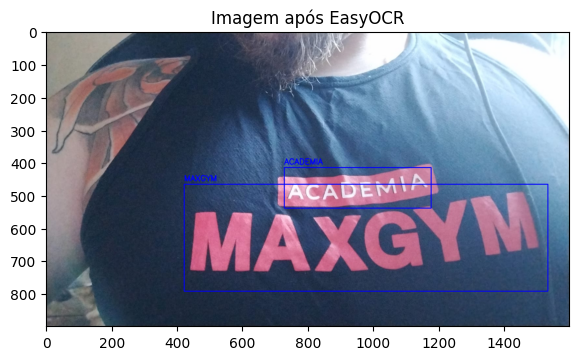

In [8]:
textos = []

for (bbox, text, prob) in resultado:
    if prob > 0.90:
        print(f'Probabilidade do texto {prob*100:.3f}% do texto {text}')

        #pegando as coordenadas para o retangulo
        (topLeft, topRight, downRight, downLeft) = bbox
        print(topLeft)
        
        topLeft = (topLeft[0], topLeft[1])
        topRight = (topRight[0], topRight[1])
        downRight = (downRight[0], downRight[1])
        downLeft = (downLeft[0], downLeft[1])

        #Removendo os caracteres Non-ASCII do texto
        #ord retorna o valor unicode
        #Valores abaixo de 128 são considerados letras
        # Join junta os elementos da lista criada
        # strip remove os espaços em branco
        text = ''.join([c if ord(c) < 128 else "" for c in text]).strip()
        textos.append(text)
        cv2.rectangle(imagem, topLeft, downRight, (255, 0, 0), 2)
        cv2.putText(imagem, text, (topLeft[0], topLeft[1]-10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    else:
        print(f'{text} tem {prob:.3f}, que é baixa probabilidade')


imshow("Imagem após EasyOCR", imagem, 12)